# RFM Analysis -
#### RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.
#### RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.


In this project , we need to perform EDA on the given dataset and with the help of RFM analysis we need to divide the customers into three different segments -
* Champions
* Potential Customers 
* Need Attention 


Importing the library-


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_excel("/Users/sakshiashutosh/Downloads/Round 1 Assignment/sales_data.xlsx")

In [4]:
dataset

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


##### This data is at transaction level. ie one row for each transaction made by a customer (note that it is not at item level).



In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

For conducting the RFM analysis , data will be summarized at customer level by taking number of days to the latest transaction, sum of all transction amount and total number of transaction.



In [25]:
dataset.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


In [9]:
df=dataset[['CustomerID','TOTAL_ORDERS','REVENUE','DAYSSINCELASTORDER']]

In [10]:
df

,CustomerID,TOTAL_ORDERS,REVENUE,DAYSSINCELASTORDER
0,22,124,11986.54,1
1,29,82,11025.96,1
2,83,43,7259.69,1
3,95,44,6992.27,1
4,124,55,6263.44,1
...,...,...,...,...
4995,173946,1,117.49,207
4996,173987,1,117.49,207
4997,174004,1,117.49,207
4998,174038,1,117.49,207


##### RFM analysis involves categorising R,F and M into 3 or more categories. For convenience, let's create 4 categories based on quartiles (quartiles roughly divide the sample into 4 segments equal proportion).



In [15]:
df.rename(columns={'TOTAL_ORDERS':'Frequency','REVENUE':'Monetary','DAYSSINCELASTORDER':'Recency'})

,CustomerID,Frequency,Monetary,Recency
0,22,124,11986.54,1
1,29,82,11025.96,1
2,83,43,7259.69,1
3,95,44,6992.27,1
4,124,55,6263.44,1
...,...,...,...,...
4995,173946,1,117.49,207
4996,173987,1,117.49,207
4997,174004,1,117.49,207
4998,174038,1,117.49,207


In [23]:
quartiles = df[['Frequency','Monetary','Recency']].quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))


      Frequency   Monetary  Recency
0.25        3.0   315.0975     7.00
0.50        8.0   966.7250    68.00
0.75       20.0  2493.0725   171.25 <class 'pandas.core.frame.DataFrame'>


In [26]:
quartiles=quartiles.to_dict()
quartiles


{'Frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 20.0},
 'Monetary': {0.25: 315.09749999999997, 0.5: 966.725, 0.75: 2493.0725},
 'Recency': {0.25: 7.0, 0.5: 68.0, 0.75: 171.25}}

In [40]:
## for recency 
def R(x):
    if x < 7.00:
        return 4
    elif x >= 7 and  x < 68.00:
        return 3
    elif x >= 68.00 and x<171.25:
        return 2
    else:
        return 1
## for frequency  
def F(x):
    if x < 3.0 :
        return 1
    if x>=3.0 and x<8.0:
        return 2
    if x>=8.0 and x<20.0:
        return 3
    else:
        return 4

## for monetary 
def M(x):
    if x<315.0975 :
        return 1
    if x>=315.0975 and x<966.7250:
        return 2
    if x>=966.7250 and x<2493.0725:
        return 3
    else :
        return 4


In [41]:
rfm_Seg = df
rfm_Seg['R_score'] = rfm_Seg['Recency'].apply(R)
rfm_Seg['F_score'] = rfm_Seg['Frequency'].apply(F)
rfm_Seg['M_score'] = rfm_Seg['Monetary'].apply(M)


/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/1344374351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_Seg['R_score'] = rfm_Seg['Recency'].apply(R)
/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/1344374351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_Seg['F_score'] = rfm_Seg['Frequency'].apply(F)
/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/1344374351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

##### For analysis it is critical to combine the scores to create a single score. There are few approaches. One approach is to just concatenate the scores to create a 3 digit number between 111 and 444. Here the drawback is too many categories (4x4x4). Also, not easy prioritise scores like 421 vs 412.



In [124]:
rfm_Seg['RFM_Score'] = rfm_Seg.R_score.map(str) \
                            + rfm_Seg.F_score.map(str) \
                            + rfm_Seg.M_score.map(str)


/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/1521777675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_Seg['RFM_Score'] = rfm_Seg.R_score.map(str) \


In [55]:
rfm_Seg

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,22,124,11986.54,1,4,4,4,444
1,29,82,11025.96,1,4,4,4,444
2,83,43,7259.69,1,4,4,4,444
3,95,44,6992.27,1,4,4,4,444
4,124,55,6263.44,1,4,4,4,444
...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,207,1,1,1,111
4996,173987,1,117.49,207,1,1,1,111
4997,174004,1,117.49,207,1,1,1,111
4998,174038,1,117.49,207,1,1,1,111


#### Customer Segmentation-


In [58]:
rfm_Seg["RFM_Score"]=pd.to_numeric(rfm_Seg["RFM_Score"])

/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/3766379435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_Seg["RFM_Score"]=pd.to_numeric(rfm_Seg["RFM_Score"])


In [59]:
segment = rfm_Seg[['RFM_Score']].quantile(q=[0.25,0.50,0.75])
print(segment, type(segment))


      RFM_Score
0.25     194.25
0.50     244.00
0.75     344.00 <class 'pandas.core.frame.DataFrame'>


In [62]:
def customer_type(x):
    if x < 194.25:
        return "at_risk"
    if x>=194.25 and x<244.00:
        return "Potential_customer"
    if x>=244.00 and x<344.00:
        return "Need_Attention"
    else:
        return "Champion_customer"

In [63]:
rfm_segmentation=rfm_Seg
rfm_segmentation["Customer_type"]=rfm_segmentation['RFM_Score'].apply(customer_type)


/var/folders/xm/_htqc57d3pn3xkh8dt_cxj_c0000gn/T/ipykernel_71166/164603830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_segmentation["Customer_type"]=rfm_segmentation['RFM_Score'].apply(customer_type)


In [64]:
rfm_segmentation

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Customer_type
0,22,124,11986.54,1,4,4,4,444,Champion_customer
1,29,82,11025.96,1,4,4,4,444,Champion_customer
2,83,43,7259.69,1,4,4,4,444,Champion_customer
3,95,44,6992.27,1,4,4,4,444,Champion_customer
4,124,55,6263.44,1,4,4,4,444,Champion_customer
...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,207,1,1,1,111,at_risk
4996,173987,1,117.49,207,1,1,1,111,at_risk
4997,174004,1,117.49,207,1,1,1,111,at_risk
4998,174038,1,117.49,207,1,1,1,111,at_risk


In [68]:
rfm_segmentation['Customer_type'].value_counts()

Champion_customer     1674
at_risk               1250
Need_Attention        1082
Potential_customer     994
Name: Customer_type, dtype: int64

Text(0, 0.5, 'Number of customer')

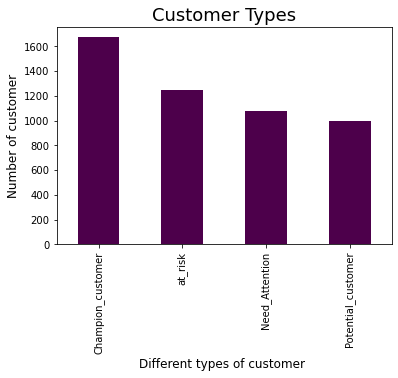

In [141]:
rfm_segmentation['Customer_type'].value_counts().plot(kind='bar',colormap='BuPu_r')
plt.title("Customer Types",size=18)
plt.xlabel("Different types of customer ",size=12)
plt.ylabel("Number of customer",size=12)

#### We are having a good number of champion customers .
#### Also we are having good number of customers at a risk phase of either loosing them or having not so good relation with them .

### Hourly Analysis of Orders 

In [125]:
dataset[['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']].sum()

TIME_0000_0600_ORDERS     5144
TIME_0601_1200_ORDERS    18731
TIME_1200_1800_ORDERS    22170
TIME_1801_2359_ORDERS    18307
dtype: int64

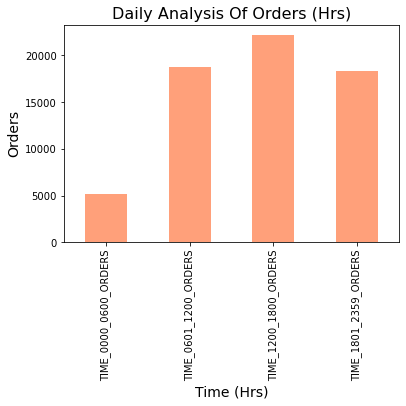

In [127]:
dataset[['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']].sum().plot(kind='bar',color='lightsalmon')
plt.title("Daily Analysis Of Orders (Hrs)",size=16)
plt.xlabel("Time (Hrs)",size=14)
plt.ylabel("Orders",size=14)
plt.show()

### Hourly Analysis of Revenue

In [128]:
dataset[['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']].sum()

TIME_0000_0600_REVENUE     655313.18
TIME_0601_1200_REVENUE    2434319.34
TIME_1200_1800_REVENUE    2923658.13
TIME_1801_2359_REVENUE    2394328.55
dtype: float64

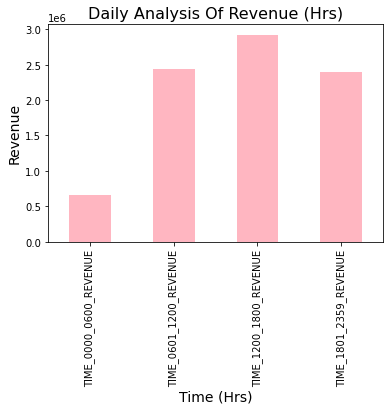

In [129]:
dataset[['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']].sum().plot(kind='bar',color='lightpink')
plt.title("Daily Analysis Of Revenue (Hrs)",size=16)
plt.xlabel("Time (Hrs)",size=14)
plt.ylabel("Revenue",size=14)
plt.show()

### Weekly Analysis Of Orders 

In [97]:
dataset[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].sum()

MONDAY_ORDERS        8145
TUESDAY_ORDERS       8772
WEDNESDAY_ORDERS     8990
THURSDAY_ORDERS     10670
FRIDAY_ORDERS        9731
SATURDAY_ORDERS      8417
SUNDAY_ORDERS        9627
dtype: int64

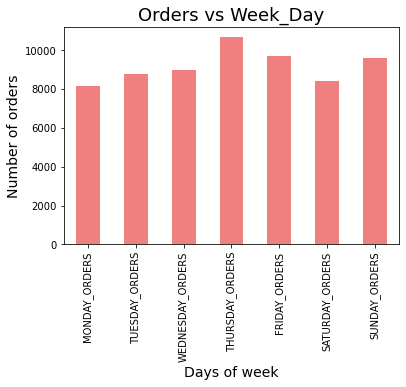

In [132]:
dataset[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].sum().plot(kind='bar',color='lightcoral')
plt.title("Orders vs Week_Day",size=18)
plt.xlabel("Days of week",size=14)
plt.ylabel("Number of orders",size=14)
plt.show()

### Weekly Analysis Of Revenue 

In [101]:
dataset[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()

MONDAY_REVENUE       1076041.68
TUESDAY_REVENUE      1167552.15
WEDNESDAY_REVENUE    1178446.47
THURSDAY_REVENUE     1329748.98
FRIDAY_REVENUE       1252902.77
SATURDAY_REVENUE     1098210.50
SUNDAY_REVENUE       1304716.65
dtype: float64

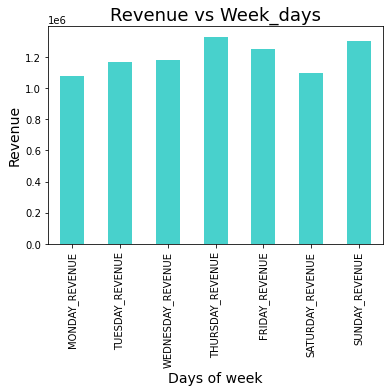

In [133]:
dataset[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum().plot(kind='bar',color='mediumturquoise')
plt.title("Revenue vs Week_days",size=18)
plt.xlabel("Days of week",size=14)
plt.ylabel("Revenue",size=14)
plt.show()

### Monthly Analysis Of Orders In Respect To Week -

In [134]:
dataset[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum()

WEEK1_DAY01_DAY07_ORDERS    14989
WEEK2_DAY08_DAY15_ORDERS    15313
WEEK3_DAY16_DAY23_ORDERS    16150
WEEK4_DAY24_DAY31_ORDERS    17900
dtype: int64

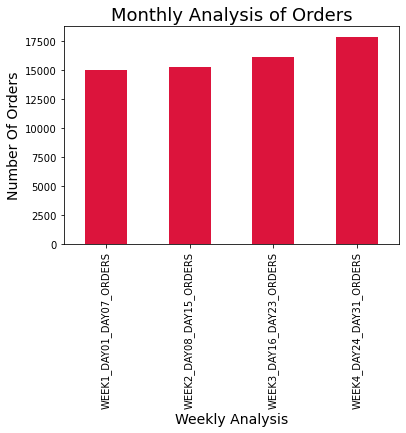

In [136]:
dataset[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum().plot(kind='bar',color='crimson')
plt.title('Monthly Analysis of Orders',size=18)
plt.xlabel("Weekly Analysis",size=14)
plt.ylabel("Number Of Orders",size=14)
plt.show()

### Monthly Analysis Of Revenue With Respect To Week-

In [137]:
dataset[["WEEK1_DAY01_DAY07_REVENUE",'WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum()

WEEK1_DAY01_DAY07_REVENUE    1893191.73
WEEK2_DAY08_DAY15_REVENUE    2032978.67
WEEK3_DAY16_DAY23_REVENUE    2109134.54
WEEK4_DAY24_DAY31_REVENUE    2372314.26
dtype: float64

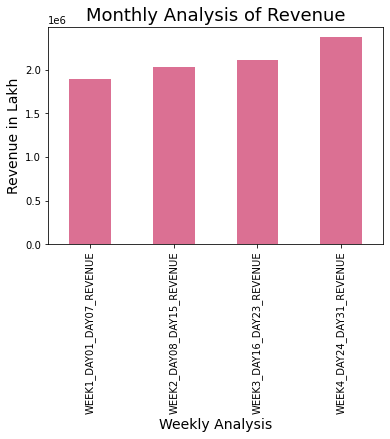

In [138]:
dataset[["WEEK1_DAY01_DAY07_REVENUE",'WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum().plot(kind='bar',color='palevioletred')
plt.title("Monthly Analysis of Revenue",size=18)
plt.xlabel("Weekly Analysis",size=14)
plt.ylabel("Revenue in Lakh",size=14)
plt.show()